#Marked Assignment 1
#Problem 1

#Importing the necessary modules

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1 Data Exploration and Understanding
#Data Overview
dataset = pd.read_csv('/content/drive/MyDrive/Ai/WHR-2024-5CS037.csv')
print(dataset.head(10))

# number of row & column
print("The number of row and column are:")
row,column = dataset.shape
print(f"Row: {row}")
print(f"Column: {column}")

#List the columns
print("The columns with their data types are:\n ",dataset.dtypes)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

#Basic Statistics
#Calculating the mean,median and standard deviation for the Score column

In [46]:

mean_score  = np.mean(dataset['score'])
median_score = np.median(dataset['score'])
std_score = np.std(dataset['score'])

print(f"The mean is:{mean_score:.2f}")
print(f"The median is:{median_score:.2f}")
print(f"The standard deviation is:{std_score:.2f}")


# highest happiness score
highest_score = dataset['score'].max()
highest_score_country = dataset.loc[dataset['score'] == highest_score,['Country name']].values[0][0]
print(f"The highest happiness score is:{highest_score} of {highest_score_country}" )

#Lowest happiness score
lowest_score = dataset['score'].min()
lowest_score_country = dataset.loc[dataset['score'] == lowest_score,['Country name']].values[0][0]
print(f"The lowest happiness score is:{lowest_score} of {lowest_score_country}" )




The mean is:5.53
The median is:5.79
The standard deviation is:1.17
The highest happiness score is:7.741 of Finland
The lowest happiness score is:1.721 of Afghanistan


#-------------------Missing Values----------------
#Checking Missing Values

In [47]:
print(dataset.isnull().sum())
dataset.dropna(inplace = True)
print(dataset.isnull().sum())

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64
Country name                    0
score                           0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64


#Filtering and Sorting the data
#Country with score greater than 7.5

In [48]:
filter_by_score = dataset.loc[dataset['score'] > 7.5]
order_by_gdp =filter_by_score.sort_values(by='Log GDP per capita', ascending=False)
print(order_by_gdp.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  



Adding New Column

#New Column Happiness_Category(Category based on Score)

In [49]:
scores=[]
for row in dataset['score']:
  if row > 6:
    scores.append('High')
  elif 4<=row<=6:
    scores.append('Medium')
  elif row < 4:
    scores.append('Low')
dataset['Happiness_Category'] = scores
print(dataset.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

Data Visualizations
#Plotting the top 10 happiest countries by Score in bar chart

<Axes: title={'center': 'Top 10 Happiest Countries by Score'}, xlabel='Country name'>

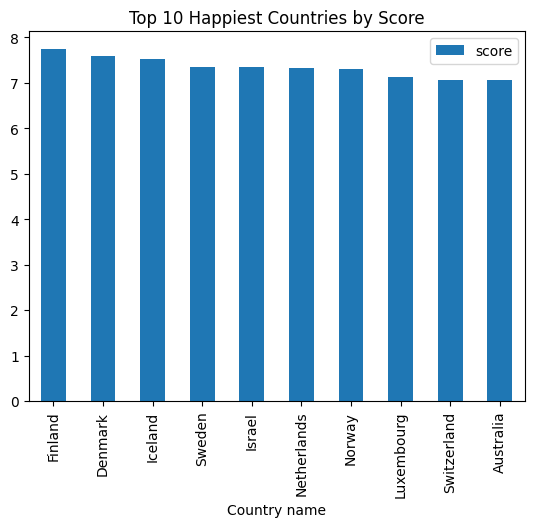

In [50]:
#Data Visualizations

#Plotting the top 10 happiest countries by Score in bar chart
happiest_countries = dataset.sort_values(by='score', ascending=False).head(10)
happiest_countries.plot(kind='bar', x='Country name', y='score', title='Top 10 Happiest Countries by Score')



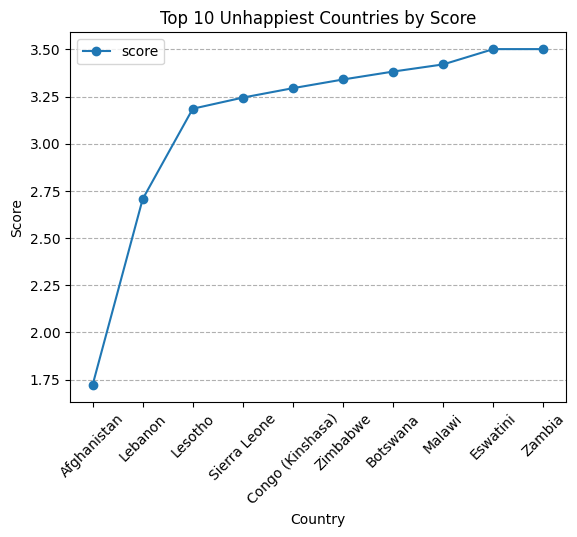

In [51]:
#Plotting the top 10 unhappiest countries by Score in a Line graph
unhappiest_countries = dataset.sort_values(by='score', ascending=True).head(10)
countries_plot=unhappiest_countries.plot(kind='line', x='Country name', y='score',marker='o', title='Top 10 Unhappiest Countries by Score')
countries_plot.set_xticks(range(len(unhappiest_countries)))
countries_plot.set_xticklabels(unhappiest_countries['Country name'],rotation=45)
countries_plot.set_xlabel('Country')
countries_plot.set_ylabel('Score')
countries_plot.grid(axis='y', linestyle='--')
plt.show()



#Preparing the South-Asia Dataset

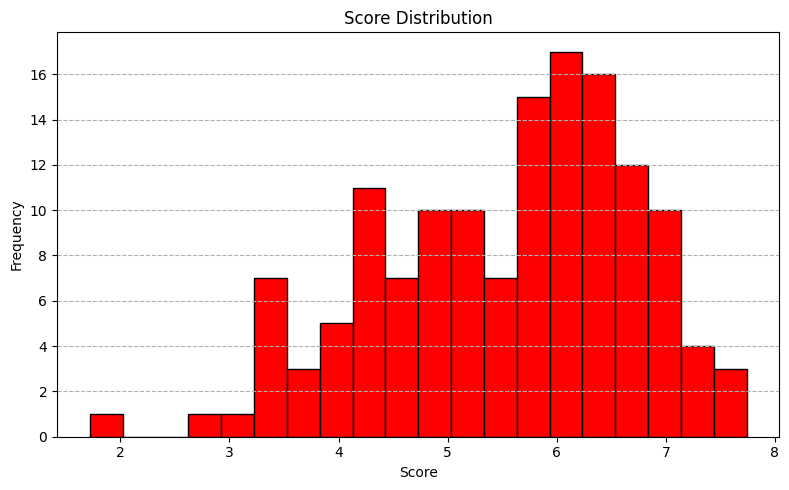

In [52]:
# A histogram to show the Score column and its distribution
plt.figure(figsize=(8, 5))
plt.hist(dataset['score'], bins=20, color='red', edgecolor='black')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()  # Ensures proper spacing
plt.show()

Text(0, 0.5, 'Score')

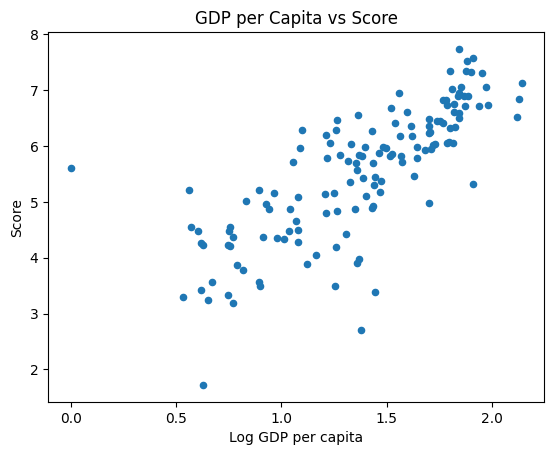

In [53]:

#A scatter plot between GDP per Capita and Score
scatter_plot = dataset.plot(kind='scatter', x='Log GDP per capita', y='score', title='GDP per Capita vs Score')
scatter_plot.set_xlabel('Log GDP per capita')
scatter_plot.set_ylabel('Score')

Some Advance Data Exploration Task
#Preparing the South-Asia Dataset

In [54]:
south_asian_countires = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

#Filter the matching data from the list
filter_data_south_asian = dataset[dataset['Country name'].isin(south_asian_countires)]

#Save in a new dataset
south_asian_countries_csv = filter_data_south_asian.to_csv('/content/south_asian_countries.csv', index=False)
south_asian_countries_csv = pd.read_csv('/content/south_asian_countries.csv')
print(south_asian_countries_csv)

  Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3   Bangladesh  3.886               1.122           0.249   
4  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.513                         0.775       0.140   
4                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residual Happiness_Category  
0                      0.115                1.783             Medium  
1                      0.074                1.907         

Composite Score Ranking
#Reading the southasia dataframe

In [55]:
#Composite Score Ranking
#Reading the southasia dataframe
south_asia = pd.read_csv('/content/south_asian_countries.csv')

#Creating a New Column Composite Score
south_asia['Composite Score'] = 0.4 * south_asia['Log GDP per capita'] + 0.3 * south_asia['Social support'] + 0.3 * south_asia['Healthy life expectancy']
print(south_asia.head(10))
#Ranking Based on composite Score(Descending)
rank_composite_score = south_asia.sort_values(by='Composite Score', ascending=False)






  Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3   Bangladesh  3.886               1.122           0.249   
4  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.513                         0.775       0.140   
4                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residual Happiness_Category  \
0                      0.115                1.783             Medium   
1                      0.074                1.907       

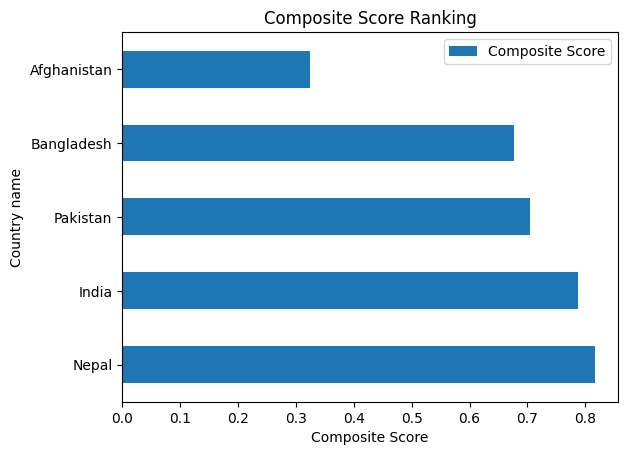

In [56]:

#Bar Graph for the top 5 countries(Horizontal Bar Chart)
bar_plot = rank_composite_score.plot(kind='barh', x='Country name', y='Composite Score',title='Composite Score Ranking')
plt.xlabel("Composite Score")
plt.show()
#Score vs Composite Score

<BarContainer object of 5 artists>

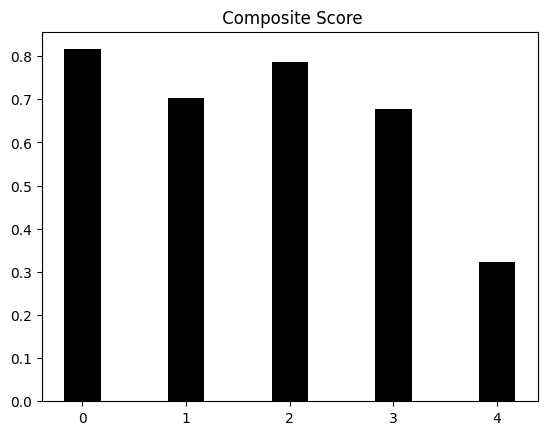

In [57]:
# Plot Composite Score bars
plt.title(' Composite Score')
x = range(len(south_asia))
width = 0.35
plt.bar(x, south_asia['Composite Score'], width, label='Composite Score', color='black')


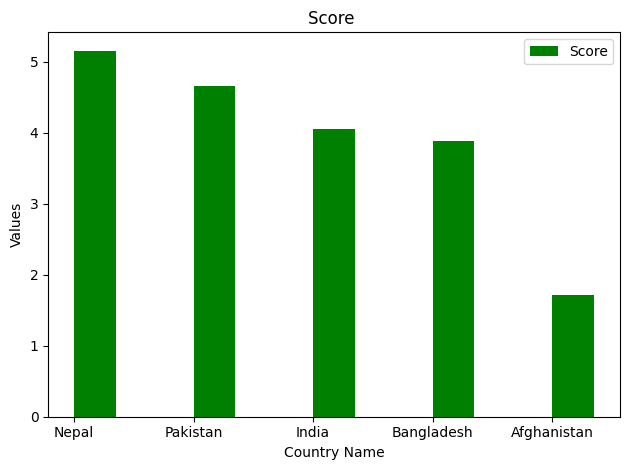

In [58]:
# Plot Score bars  Composite Score
plt.bar([p + width for p in x], south_asia['score'], width, label='Score', color='green')
plt.title('Score ')
plt.xlabel('Country Name')
plt.ylabel('Values')
plt.xticks([p + width / 2 for p in x], south_asia['Country name'])
plt.tight_layout()
plt.legend()
plt.show()

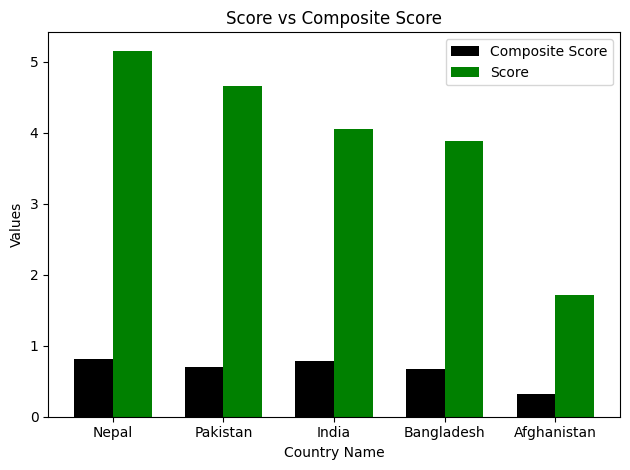

In [59]:
# Plot Composite Score bars
x = range(len(south_asia))
width = 0.35
plt.bar(x, south_asia['Composite Score'], width, label='Composite Score', color='black')

# Plot Score bars next to Composite Score
plt.bar([p + width for p in x], south_asia['score'], width, label='Score', color='green')
plt.title('Score vs Composite Score')
plt.xlabel('Country Name')
plt.ylabel('Values')
plt.xticks([p + width / 2 for p in x], south_asia['Country name'])
plt.tight_layout()
plt.legend()
plt.show()

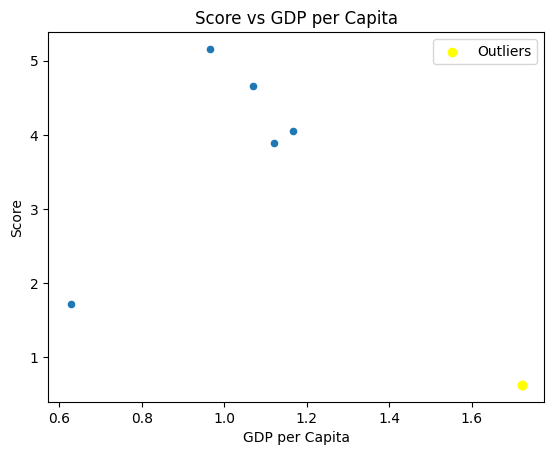

In [60]:
#Outlier Detection

#Using the 1.5 * IQR rule
def find_outliers(column_name):
    Q1 = south_asia[column_name].quantile(0.25)
    Q3 = south_asia[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return south_asia[(south_asia[column_name] < lower_bound) | (south_asia[column_name] > upper_bound)]
south_asia_plot = south_asia.plot(kind='scatter', x='Log GDP per capita', y='score', title='Score vs GDP per Capita')
south_asia_plot.set_xlabel('GDP per Capita')
south_asia_plot.set_ylabel('Score')

outliers = pd.concat([find_outliers('score'), find_outliers('Log GDP per capita')])
south_asia_plot.scatter(outliers['score'], outliers['Log GDP per capita'], color='yellow', label='Outliers')
south_asia_plot.legend()
plt.show()

The correlation between Freedom to make life choices and score is: 0.80
The correlation between Generosity and score is: 0.88


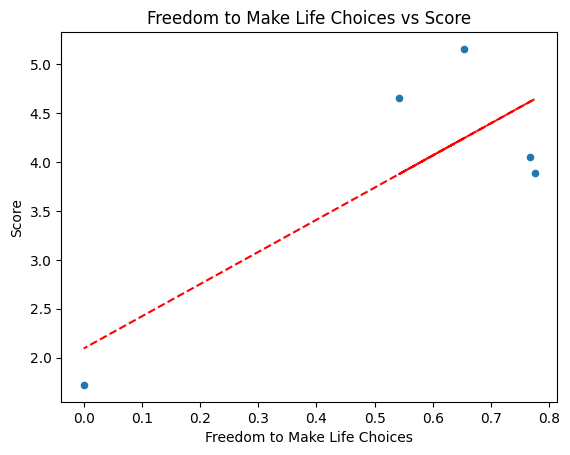

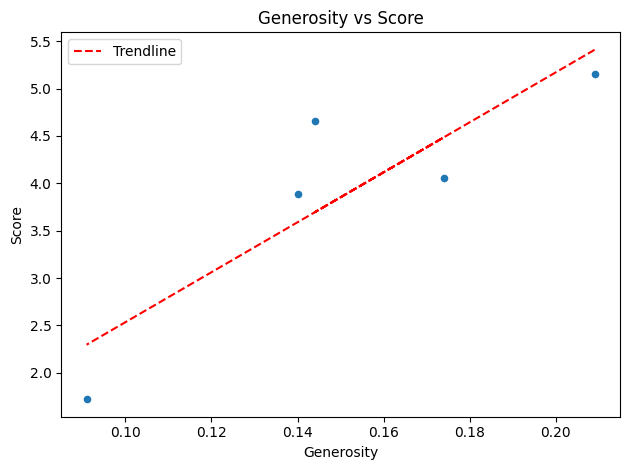

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'south_asia' is your DataFrame

# Define new variable names
freedom_column = 'Freedom to make life choices'
generosity_column = 'Generosity'

# Calculating the Pearson correlation
corr_freedom_score = south_asia[freedom_column].corr(south_asia['score'], method='pearson')
corr_generosity_score = south_asia[generosity_column].corr(south_asia['score'], method='pearson')

print(f"The correlation between Freedom to make life choices and score is: {corr_freedom_score:.2f}")
print(f"The correlation between Generosity and score is: {corr_generosity_score:.2f}")

# Scatter plot for Freedom to make life choices against Score
freedom_plot = south_asia.plot(kind='scatter', x=freedom_column, y='score', title='Freedom to Make Life Choices vs Score')
freedom_plot.set_xlabel('Freedom to Make Life Choices')
freedom_plot.set_ylabel('Score')

# Trendline for Freedom to make Life Choices
freedom_z = np.polyfit(south_asia[freedom_column], south_asia['score'], 1)
freedom_p = np.poly1d(freedom_z)
freedom_plot.plot(south_asia[freedom_column], freedom_p(south_asia[freedom_column]), color='red', linestyle='--', label='Trendline')

# Scatter plot for Generosity against Score
generosity_plot = south_asia.plot(kind='scatter', x=generosity_column, y='score', title='Generosity vs Score')
generosity_plot.set_xlabel('Generosity')
generosity_plot.set_ylabel('Score')

# Trendline for Generosity
generosity_z = np.polyfit(south_asia[generosity_column], south_asia['score'], 1)
generosity_p = np.poly1d(generosity_z)
generosity_plot.plot(south_asia[generosity_column], generosity_p(south_asia[generosity_column]), color='red', linestyle='--', label='Trendline')

# Adding legend for both plots
plt.legend()
plt.tight_layout()
plt.show()


  Country name  score  Log GDP per capita  Social support  \
4  Afghanistan  1.721               0.628           0.000   
3   Bangladesh  3.886               1.122           0.249   
2        India  4.054               1.166           0.653   
1     Pakistan  4.657               1.069           0.600   
0        Nepal  5.158               0.965           0.990   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
4                    0.242                         0.000       0.091   
3                    0.513                         0.775       0.140   
2                    0.417                         0.767       0.174   
1                    0.321                         0.542       0.144   
0                    0.443                         0.653       0.209   

   Perceptions of corruption  Dystopia + residual Happiness_Category  \
4                      0.088                0.672                Low   
3                      0.167                0.919       

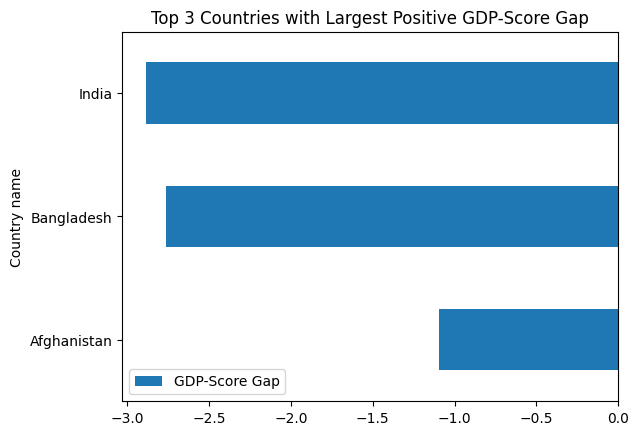

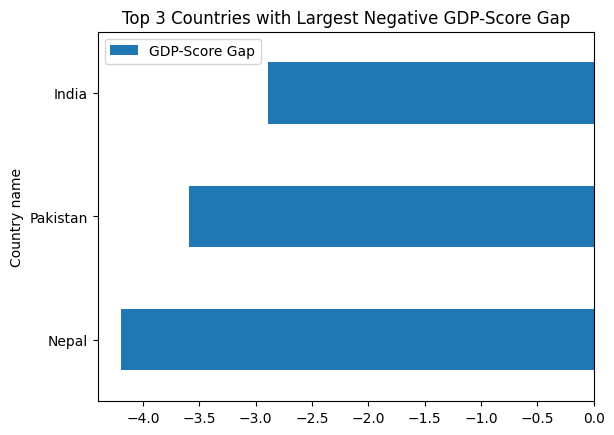

In [62]:
#-Gap Analysis

#Creating a new column GDP-Score Gap
south_asia['GDP-Score Gap'] = south_asia['Log GDP per capita'] - south_asia['score']

rank_gdp_score_gap = south_asia.sort_values(by='GDP-Score Gap', ascending=False)
rank_gdp_score_gap_asc = south_asia.sort_values(by='GDP-Score Gap', ascending=True)
top_three_countries = rank_gdp_score_gap.head(3)

# the top three countries
top_three_countries_plot = top_three_countries.plot(kind='barh', x='Country name', y='GDP-Score Gap', title='Top 3 Countries with Largest Positive GDP-Score Gap')
#largest negative
largest_negative_gaps = rank_gdp_score_gap_asc.head(3)
largest_negative_gaps_plot = largest_negative_gaps.plot(kind='barh', x='Country name', y='GDP-Score Gap', title='Top 3 Countries with Largest Negative GDP-Score Gap')

print(rank_gdp_score_gap.head(10))
print(rank_gdp_score_gap_asc.head(10))

In [63]:
# Filter Middle East countries from the dataset
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_csv = dataset[dataset['Country name'].isin(middle_east_countries)]

# Define South Asia countries and filter
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives",
                        "Nepal", "Pakistan", "Sri Lanka"]
south_asia_csv = dataset[dataset['Country name'].isin(south_asia_countries)]

# Descriptive Statistics: Mean Scores
mean_score_middle_east = middle_east_csv['score'].mean()
mean_score_south_asia = south_asia_csv['score'].mean()

print(f"The mean score of Middle East countries is: {mean_score_middle_east:.2f}")
print(f"The mean score of South Asia countries is: {mean_score_south_asia:.2f}")

if mean_score_middle_east > mean_score_south_asia:
    print(f"Middle East countries have a higher mean score than South Asia countries.\nMiddle East Score: {mean_score_middle_east:.2f}")
else:
    print(f"South Asia countries have a higher mean score than Middle East countries.\nSouth Asia Score: {mean_score_south_asia:.2f}")

# Descriptive Statistics: Standard Deviation
std_middle_east = middle_east_csv['score'].std()
std_south_asia = south_asia_csv['score'].std()

print(f"The standard deviation of Middle East countries is: {std_middle_east:.2f}")
print(f"The standard deviation of South Asia countries is: {std_south_asia:.2f}")


The mean score of Middle East countries is: 5.35
The mean score of South Asia countries is: 3.90
Middle East countries have a higher mean score than South Asia countries.
Middle East Score: 5.35
The standard deviation of Middle East countries is: 1.65
The standard deviation of South Asia countries is: 1.18


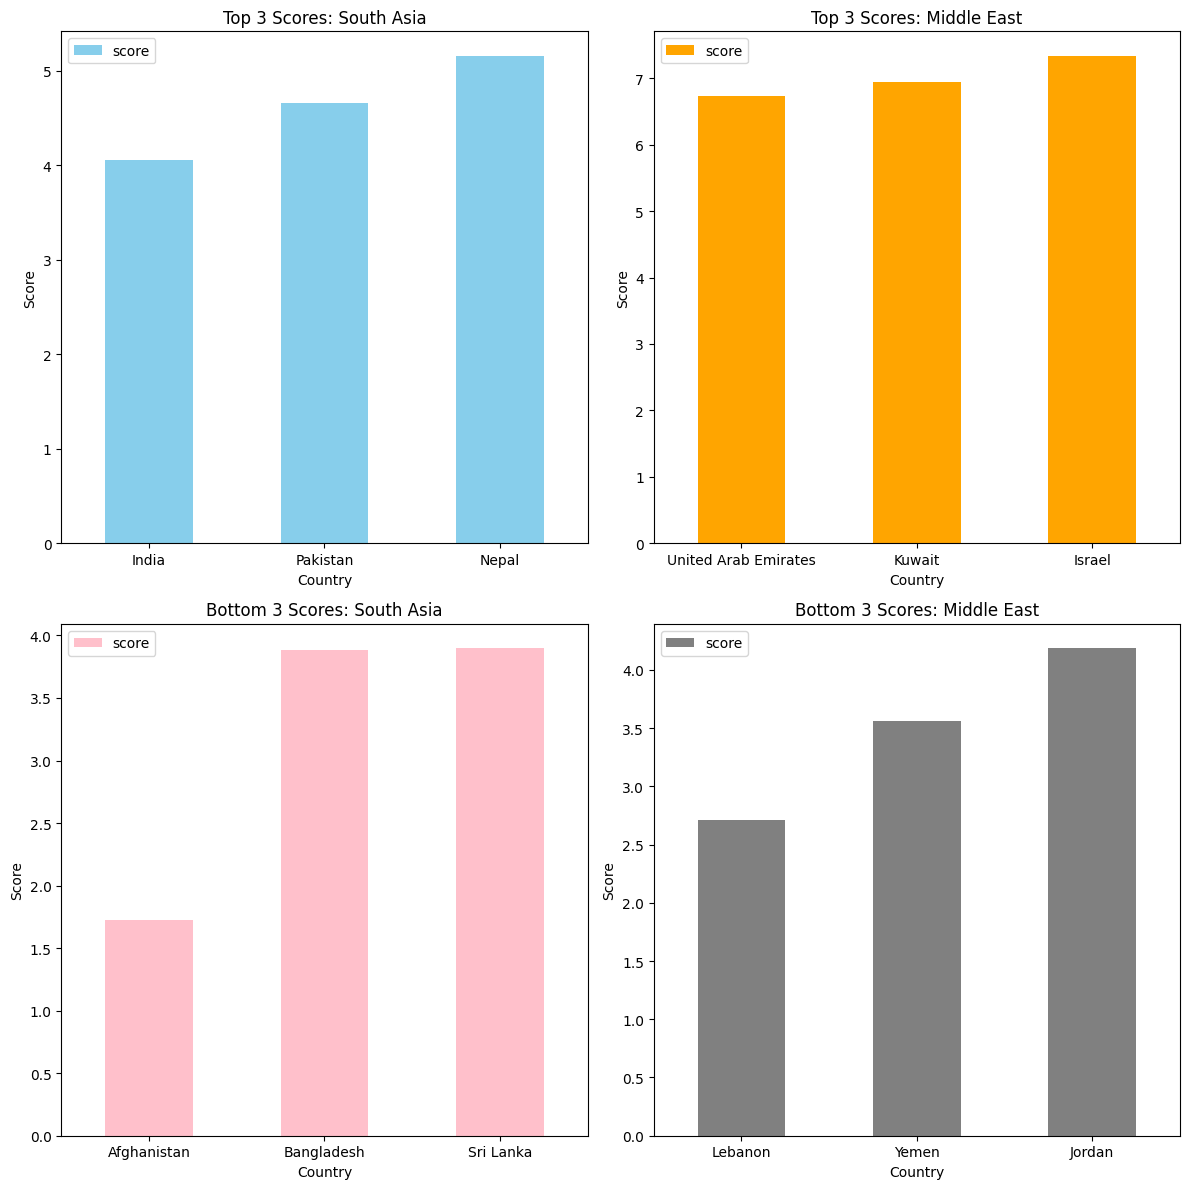

<Figure size 1000x600 with 0 Axes>

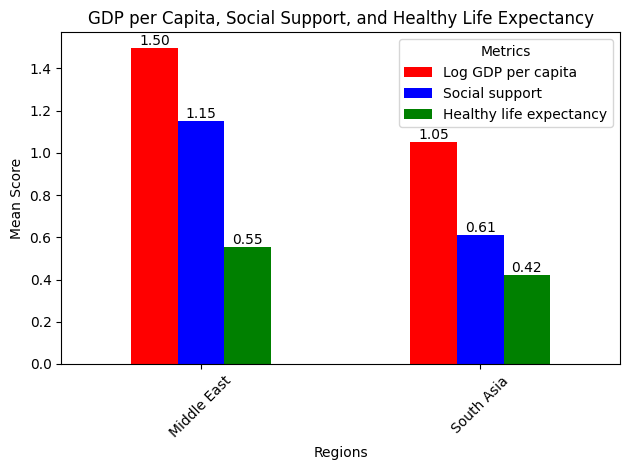

In [64]:
# Top 3 and Bottom 3 from South Asia
south_asia_bottom3 = south_asia_csv.sort_values(by='score').head(3)
south_asia_top3 = south_asia_csv.sort_values(by='score').tail(3)

# Top 3 and Bottom 3 from Middle East
middle_east_bottom3 = middle_east_csv.sort_values(by='score').head(3)
middle_east_top3 = middle_east_csv.sort_values(by='score').tail(3)

# Top 3 Bar Charts
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Top 3 Scores for South Asia
south_asia_top3.plot(kind='bar', x='Country name', y='score', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Top 3 Scores: South Asia')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=360)

# Top 3 Scores for Middle East
middle_east_top3.plot(kind='bar', x='Country name', y='score', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Top 3 Scores: Middle East')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=360)

# Bottom 3 Scores for South Asia
south_asia_bottom3.plot(kind='bar', x='Country name', y='score', ax=axes[1, 0], color='pink')
axes[1, 0].set_title('Bottom 3 Scores: South Asia')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=360)

# Bottom 3 Scores for Middle East
middle_east_bottom3.plot(kind='bar', x='Country name', y='score', ax=axes[1, 1], color='gray')
axes[1, 1].set_title('Bottom 3 Scores: Middle East')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=360)

# Adjust layout
plt.tight_layout()
plt.show()

# Metric Comparisons
# Combine and filter data
combined_data = pd.concat([
    south_asia_csv.assign(Region='South Asia'),
    middle_east_csv.assign(Region='Middle East')
])
combined_data = combined_data[['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Region']]

# Group by Region and calculate mean
pivot_data = combined_data.groupby('Region').mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = pivot_data.plot(kind='bar', color=['red', 'blue', 'green'])
plt.legend(title='Metrics', loc='upper right')
plt.title('GDP per Capita, Social Support, and Healthy Life Expectancy')
plt.xlabel('Regions')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

plt.show()


In [65]:
# Calculate variability (range of scores)
south_asia_variability = south_asia_csv['score'].max() - south_asia_csv['score'].min()
middle_east_variability = middle_east_csv['score'].max() - middle_east_csv['score'].min()

# Calculate the coefficient of variation (CV)
CV_south_asia = south_asia_csv['score'].std() / south_asia_csv['score'].mean()
CV_middle_east = middle_east_csv['score'].std() / middle_east_csv['score'].mean()

# Display results
print(f"The variability (range) of South Asia is: {south_asia_variability:.2f}")
print(f"The variability (range) of Middle East is: {middle_east_variability:.2f}")
print(f"The coefficient of variation (CV) of South Asia is: {CV_south_asia:.2f}")
print(f"The coefficient of variation (CV) of Middle East is: {CV_middle_east:.2f}")


The variability (range) of South Asia is: 3.44
The variability (range) of Middle East is: 4.63
The coefficient of variation (CV) of South Asia is: 0.30
The coefficient of variation (CV) of Middle East is: 0.31


The correlation between Freedom to make life choices and score (South Asia) is: 0.80
The correlation between Generosity and score (South Asia) is: 0.88
The correlation between Freedom to make life choices and score (Middle East) is: 0.86
The correlation between Generosity and score (Middle East) is: 0.63


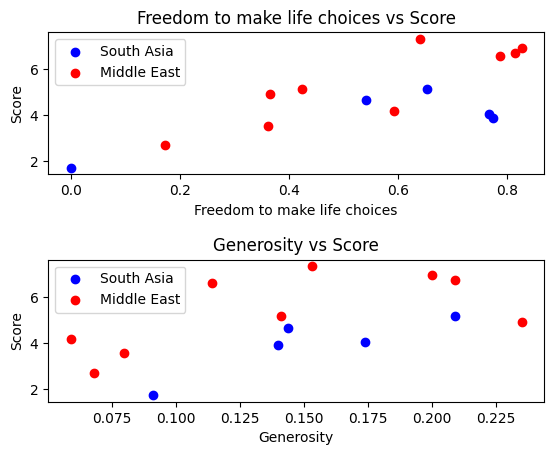

In [66]:
#Correlation Analysis

# Calculate correlation for South Asia
corr_life_choices_south_asia = south_asia['Freedom to make life choices'].corr(south_asia['score'], method='pearson')
corr_generosity_south_asia = south_asia['Generosity'].corr(south_asia['score'], method='pearson')

print(f"The correlation between Freedom to make life choices and score (South Asia) is: {corr_life_choices_south_asia:.2f}")
print(f"The correlation between Generosity and score (South Asia) is: {corr_generosity_south_asia:.2f}")

# Calculate correlation for Middle East
corr_life_choices_middle_east = middle_east_csv['Freedom to make life choices'].corr(middle_east_csv['score'], method='pearson')
corr_generosity_middle_east = middle_east_csv['Generosity'].corr(middle_east_csv['score'], method='pearson')

print(f"The correlation between Freedom to make life choices and score (Middle East) is: {corr_life_choices_middle_east:.2f}")
print(f"The correlation between Generosity and score (Middle East) is: {corr_generosity_middle_east:.2f}")

# Scatter plot the combined data with different labels for each region
plt.subplot(2, 1, 1)
plt.scatter(south_asia['Freedom to make life choices'], south_asia['score'], label='South Asia', color='blue')
plt.scatter(middle_east_csv['Freedom to make life choices'], middle_east_csv['score'], label='Middle East', color='red')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.title('Freedom to make life choices vs Score')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(south_asia['Generosity'], south_asia['score'], label='South Asia', color='blue')
plt.scatter(middle_east_csv['Generosity'], middle_east_csv['score'], label='Middle East', color='red')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Generosity vs Score')
plt.subplots_adjust(hspace=0.6)
plt.legend()
plt.show()


  Country name  score  Log GDP per capita  Social support  \
4  Afghanistan  1.721               0.628             0.0   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
4                    0.242                           0.0       0.091   

   Perceptions of corruption  Dystopia + residual Happiness_Category  \
4                      0.088                0.672                Low   

   Composite Score  GDP-Score Gap  
4           0.3238         -1.093  
No Outliers
  Country name  score  Log GDP per capita  Social support  \
4  Afghanistan  1.721               0.628             0.0   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
4                    0.242                           0.0       0.091   

   Perceptions of corruption  Dystopia + residual Happiness_Category  \
4                      0.088                0.672                Low   

   Composite Score  GDP-Score Gap  
4           0.3238         -1.093  
No Outliers


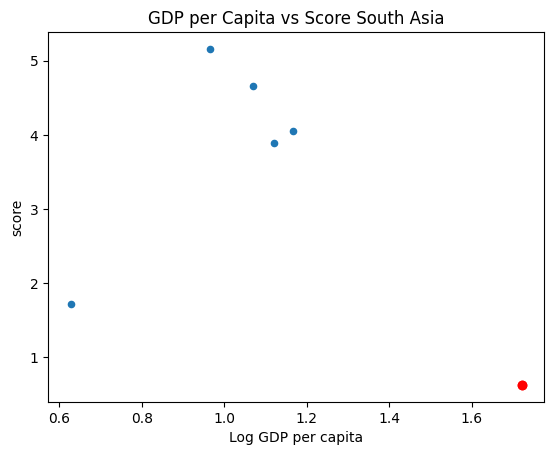

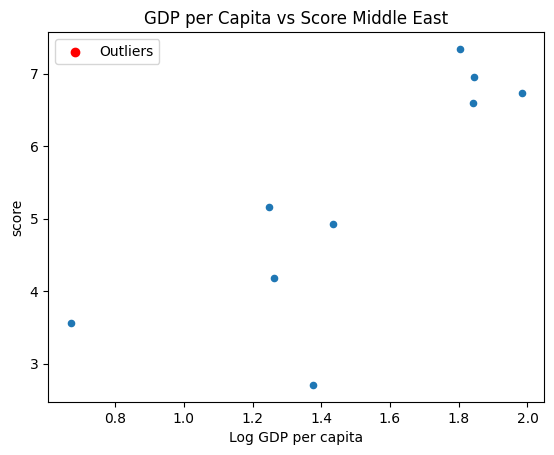

In [67]:
#------------------------------Outlier Detection---------------------------------------
def find_outliers_south_asia(column_name):
    Q1 = south_asia[column_name].quantile(0.25)
    Q3 = south_asia[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return south_asia[(south_asia[column_name] < lower_bound) | (south_asia[column_name] > upper_bound)]
def find_outliers_middle_east(column_name):
    Q1 = middle_east_csv[column_name].quantile(0.25)
    Q3 = middle_east_csv[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return middle_east_csv[(middle_east_csv[column_name]<lower_bound) | (middle_east_csv[column_name]>upper_bound)]
if find_outliers_south_asia('score').empty:
  print("No Outliers")
else:
  print(find_outliers_south_asia('score'))

if find_outliers_middle_east('score').empty:
  print("No Outliers")
else:
  print(find_outliers_middle_east('score'))

if find_outliers_south_asia('Log GDP per capita').empty:
  print("No Outliers")
else:
  print(find_outliers_south_asia('Log GDP per capita'))

if find_outliers_middle_east('Log GDP per capita').empty:
  print("No Outliers")
else:
  print(find_outliers_middle_east('Log GDP per capita'))

#Plotting the outliers for each region
south_asia_normal_plot = south_asia.plot(kind='scatter', x='Log GDP per capita', y='score', title='GDP per Capita vs Score South Asia')
middle_east_normal_plot = middle_east_csv.plot(kind='scatter', x='Log GDP per capita', y='score', title='GDP per Capita vs Score Middle East')
outliers_south_asia = pd.concat([find_outliers_south_asia('score'), find_outliers_south_asia('Log GDP per capita')])
outliers_middle_east = pd.concat([find_outliers_middle_east('score'), find_outliers_middle_east('Log GDP per capita')])
south_asia_normal_plot.scatter(outliers_south_asia['score'], outliers_south_asia['Log GDP per capita'], color='red', label='Outliers')
middle_east_normal_plot.scatter(outliers_middle_east['score'], outliers_middle_east['Log GDP per capita'], color='red', label='Outliers')
plt.legend()


<ipython-input-68-eb992e58d6fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_csv['Region'] = 'Middle East'


<Figure size 800x600 with 0 Axes>

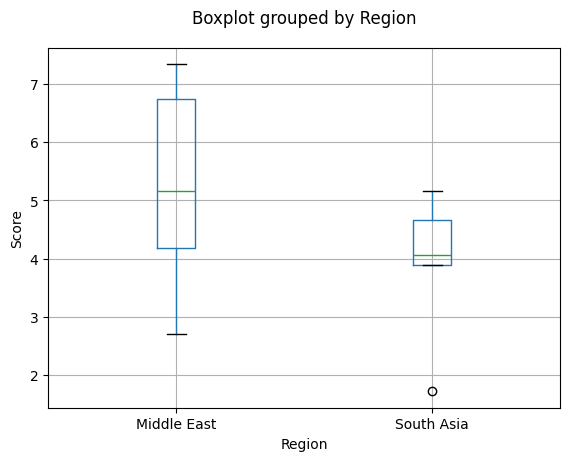

In [68]:

#------------------------Visualization------------------------------

#Box plot for comparing Score between South Asia and Middle East

south_asia['Region'] ='South Asia'
middle_east_csv['Region'] = 'Middle East'
combined_data = pd.concat([south_asia, middle_east_csv])
plt.figure(figsize=(8, 6))
combined_data.boxplot(column='score',by='Region')
plt.title('')
plt.ylabel('Score')
plt.show()

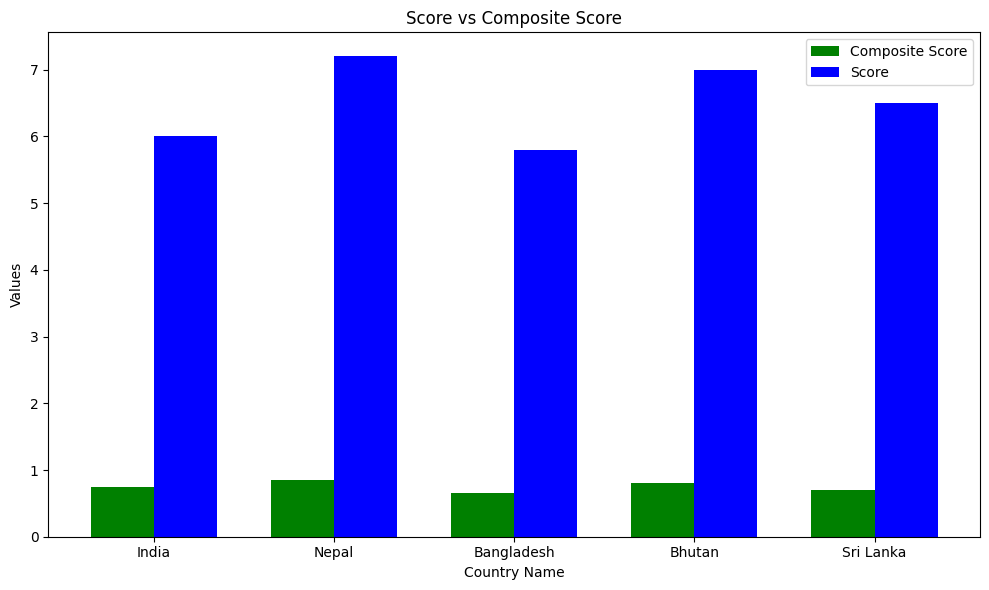

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace with your actual data)
south_asia = pd.DataFrame({
    'Country name': ['India', 'Nepal', 'Bangladesh', 'Bhutan', 'Sri Lanka'],
    'Composite Score': [0.75, 0.85, 0.65, 0.80, 0.70],
    'Score': [6.0, 7.2, 5.8, 7.0, 6.5]
})

# Create the combined bar graph
plt.figure(figsize=(10, 6))
width = 0.35  # Width of the bars

# Plot Composite Score bars
x = range(len(south_asia))
plt.bar(x, south_asia['Composite Score'], width, label='Composite Score', color='green')

# Plot Score bars next to Composite Score
plt.bar([p + width for p in x], south_asia['Score'], width, label='Score', color='blue')

# Customize the plot
plt.title('Score vs Composite Score')
plt.xlabel('Country Name')
plt.ylabel('Values')
plt.xticks([p + width / 2 for p in x], south_asia['Country name'])
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()